# Linear Regression using the Auto-mpg dataset.

Import dataset using Pandas

In [1]:
import pandas as pd

adf = pd.read_csv('auto-mpg.csv')

In [2]:
#Imports
import matplotlib.pyplot as plt

In [3]:
adf.count()

cylinders       398
displacement    398
horsepower      392
weight          398
acceleration    398
model year      398
origin          398
mpg             398
car name        398
dtype: int64

We note there are features with missing values. Let us drop the rows with missing values.

In [4]:
adf.dropna(inplace=True)  # drop rows with missing values

In [5]:
adf.count()   # verify

cylinders       392
displacement    392
horsepower      392
weight          392
acceleration    392
model year      392
origin          392
mpg             392
car name        392
dtype: int64

In [6]:
adf.head()   #snapshot of the dataset

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,mpg,car name
0,8,307.0,130.0,3504.0,12.0,70,1,18.0,chevrolet chevelle malibu
1,8,350.0,165.0,3693.0,11.5,70,1,15.0,buick skylark 320
2,8,318.0,150.0,3436.0,11.0,70,1,18.0,plymouth satellite
3,8,304.0,150.0,3433.0,12.0,70,1,16.0,amc rebel sst
4,8,302.0,140.0,3449.0,10.5,70,1,17.0,ford torino


We split our dataset into features and the target label.

In [7]:
X = adf.drop(["mpg", "car name"], axis=1) # features
y = adf["mpg"]  # label

...and create a regression model

In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [9]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import mean_squared_error, r2_score

We use 10-fold cross validation and examine the values of $R^2$ and RMSE.

In [10]:
kf = KFold(n_splits=10, shuffle= True, random_state = None)
kf.get_n_splits(X)
print(kf)

KFold(n_splits=10, random_state=None, shuffle=True)


In [11]:
for train_index, test_index in kf.split(X,y):
    #print("TRAIN: ", train_index, "TEST: ", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model.fit(X_train, y_train) #Train the model
    yhat = model.predict(X_test)
    r2=r2_score(y_test,yhat)
    rmse = mean_squared_error(y_test, yhat)
    print("r2 = ", r2, "rmse = ", rmse)

r2 =  0.7815640837439892 rmse =  11.35530373220222
r2 =  0.8427805129222382 rmse =  11.019792913869887
r2 =  0.8241274045313767 rmse =  10.129317961596897
r2 =  0.8120783380336456 rmse =  11.78527042931086
r2 =  0.8021990472629312 rmse =  10.519135295479538
r2 =  0.8134330688693333 rmse =  12.200248235689234
r2 =  0.7932343127010717 rmse =  13.08712066716562
r2 =  0.7967853595944694 rmse =  8.46590588658116
r2 =  0.7726951416561905 rmse =  15.353329820707067
r2 =  0.8544881049834726 rmse =  8.897379830213339


We observe fluctuating values of $R^2$ and RMSE. This could be because of overfitting.  

### Visualization

We now visualize the performance of the model. We will first plot the residuals.
Ideally, residuals should ideally straddle the zero line and be clustered around it.
Otherwise it indicates that a linear model may not be the best fit.

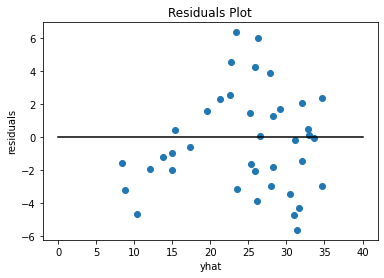

In [12]:
import matplotlib.pyplot as plt
plt.scatter(yhat, yhat-y_test)  #plot residuals vs. fitted values
plt.title("Residuals Plot")
plt.xlabel('yhat')
plt.ylabel('residuals')
plt.plot([0,40],[0,0],color='black')
plt.show()

Next we plot y predicted vs. y true on a y true identity line to see how good the predictions are.

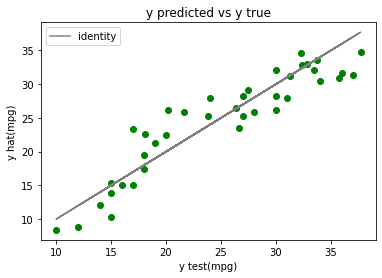

In [13]:
plt.scatter(y_test, yhat, color = "g")
plt.plot(y_test, y_test, color = "gray", label = "identity")
plt.title("y predicted vs y true")
plt.legend()
plt.xlabel("y test(mpg)")
plt.ylabel("y hat(mpg)")  
plt.show()